### yt-ASPECT frontend 

This notebook demos the current state (as of 2021-01-25) of the yt-ASPECT front end. 

Running the notebooks requires the python packages `xmltodict` and the prototype `yt` branch at https://github.com/chrishavlin/yt/tree/aspect. 

To install with `pip`:

`pip install xmltodict`

and 

`pip install git+https://github.com/chrishavlin/yt.git@aspect#egg=yt`

This notebook loads data from John Naliboff from a 3D cartesian model of fault formation during continental extensions.


### loading data

At present, the frontend can load the standard vtu files output by ASPECT. To load data stored in the configurable `yt` data directory:

In [1]:
import yt
ds = yt.load('aspect/fault_formation/solution-00050.pvtu')

yt : [INFO     ] 2021-01-25 13:04:50,591 Parameters: current_time              = 0.0
yt : [INFO     ] 2021-01-25 13:04:50,591 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-01-25 13:04:50,592 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-01-25 13:04:50,592 Parameters: domain_right_edge         = [500000.        500000.        100547.4453125]
yt : [INFO     ] 2021-01-25 13:04:50,593 Parameters: cosmological_simulation   = 0


we can check our domain size with 

In [2]:
ds.domain_width.to('km')

unyt_array([500.        , 500.        , 100.54744531], 'km')

and available fields:

In [5]:
ds.field_list

[('all', 'T'),
 ('all', 'crust_lower'),
 ('all', 'crust_upper'),
 ('all', 'current_cohesions'),
 ('all', 'current_friction_angles'),
 ('all', 'density'),
 ('all', 'heat_flux_map'),
 ('all', 'noninitial_plastic_strain'),
 ('all', 'p'),
 ('all', 'plastic_strain'),
 ('all', 'plastic_yielding'),
 ('all', 'strain_rate'),
 ('all', 'velocity_x'),
 ('all', 'velocity_y'),
 ('all', 'velocity_z'),
 ('all', 'viscosity'),
 ('connect1', 'T'),
 ('connect1', 'crust_lower'),
 ('connect1', 'crust_upper'),
 ('connect1', 'current_cohesions'),
 ('connect1', 'current_friction_angles'),
 ('connect1', 'density'),
 ('connect1', 'heat_flux_map'),
 ('connect1', 'noninitial_plastic_strain'),
 ('connect1', 'p'),
 ('connect1', 'plastic_strain'),
 ('connect1', 'plastic_yielding'),
 ('connect1', 'strain_rate'),
 ('connect1', 'velocity_x'),
 ('connect1', 'velocity_y'),
 ('connect1', 'velocity_z'),
 ('connect1', 'viscosity')]

Let's start by making some slices. First, let's slice normal to the `x` plane. By default, this will slice through the center of the domain:

yt : [INFO     ] 2021-01-25 13:08:43,954 xlim = 0.000000 500000.000000
yt : [INFO     ] 2021-01-25 13:08:43,954 ylim = 0.000000 100547.445312
yt : [INFO     ] 2021-01-25 13:08:43,955 xlim = 0.000000 500000.000000
yt : [INFO     ] 2021-01-25 13:08:43,956 ylim = 0.000000 100547.445312
yt : [INFO     ] 2021-01-25 13:08:43,957 Making a fixed resolution buffer of (('all', 'strain_rate')) 800 by 800



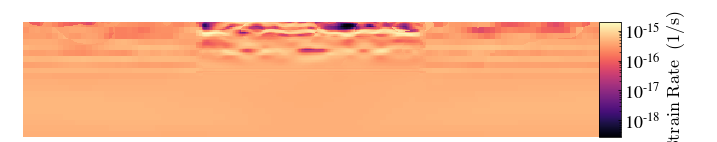

In [6]:
slc = yt.SlicePlot(ds,'x',('all','strain_rate'))
slc.set_log('strain_rate',True)
slc.set_cmap(('all','strain_rate'),'magma')
slc.hide_axes()
slc.show()

Now let's take a slice at fixed depth (normal to `z`) within the upper crust by specifying a `center` value:

yt : [INFO     ] 2021-01-25 13:10:35,782 xlim = 0.000000 500000.000000
yt : [INFO     ] 2021-01-25 13:10:35,782 ylim = 0.000000 500000.000000
yt : [INFO     ] 2021-01-25 13:10:35,783 xlim = 0.000000 500000.000000
yt : [INFO     ] 2021-01-25 13:10:35,783 ylim = 0.000000 500000.000000
yt : [INFO     ] 2021-01-25 13:10:35,784 Making a fixed resolution buffer of (('all', 'strain_rate')) 800 by 800



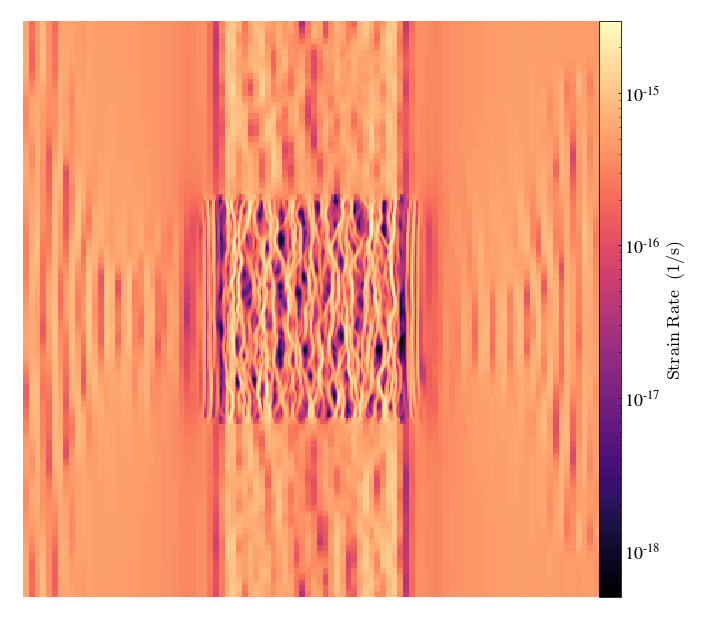

In [9]:
c_val = ds.domain_center
c_arr = yt.YTArray([c_val[0],c_val[1],ds.domain_width[2]*0.9],c_val.units) 
slc = yt.SlicePlot(ds,'z',('all','strain_rate'),center=c_arr)
slc.set_log('strain_rate',True)
slc.set_cmap(('all','strain_rate'),'magma')
slc.hide_axes()
slc.show()

we can zoom in and annotate some mesh lines:

yt : [INFO     ] 2021-01-25 13:11:33,468 xlim = 237500.000000 262500.000000
yt : [INFO     ] 2021-01-25 13:11:33,468 ylim = 237500.000000 262500.000000
yt : [INFO     ] 2021-01-25 13:11:33,469 xlim = 237500.000000 262500.000000
yt : [INFO     ] 2021-01-25 13:11:33,469 ylim = 237500.000000 262500.000000
yt : [INFO     ] 2021-01-25 13:11:33,470 Making a fixed resolution buffer of (('all', 'strain_rate')) 800 by 800



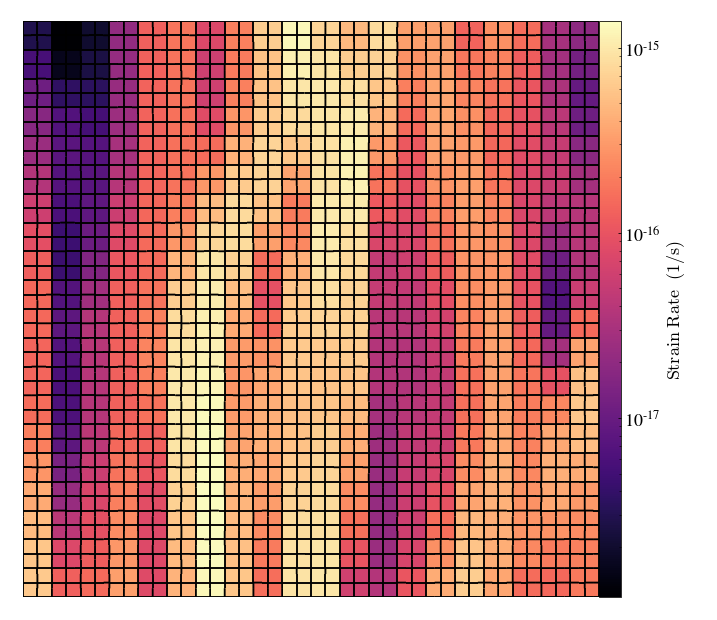

In [10]:
slc = yt.SlicePlot(ds,'z',('all','strain_rate'),center=c_arr,width=(25,'km'))
slc.annotate_mesh_lines(plot_args={'color':'black'})
slc.set_log('strain_rate',True)
slc.set_cmap(('all','strain_rate'),'magma')
slc.hide_axes()
slc.show()

### geometric sampling

*yt* provides a number of objects for geometric sampling. 


Here, we demonstrate how to extract the raw data along a line using the `ds.ray()` method. First, we set a start and end point that goes across the whole domain in `x` at the center `y` values at a height of `z=90` km:

In [12]:
startpt = ds.domain_center
endpt = ds.domain_center
startpt[0] = ds.domain_left_edge[0]
endpt[0] = ds.domain_right_edge[0]
endpt[2] = yt.YTQuantity(90,'km').to(ds.units.code_length)
startpt[2] = yt.YTQuantity(90,'km').to(ds.units.code_length)

line = ds.ray(startpt,endpt)

to extract data from elements that are intersected by this line:

In [13]:
sr = line['strain_rate']

In [14]:
sr.shape

(443, 8)

and we see we have 443 elements with 8 vertices each (corresponding to the hexahedral elements in this particular vtu file). So let's plot this up, which we'll do by first taking the mean value to get the mean value in the element, extracting the `x` distance along the path before sorting and plotting:

In [16]:
sr_val = sr.mean(axis=1)

In [17]:
vert_coords = line.fcoords_vertex
x = vert_coords.mean(axis=1)[:,0]


In [19]:
import numpy as np 

sind = np.argsort(x)
sr_mean = sr_val[sind]
x = x[sind]

Text(0, 0.5, 'strain rate')

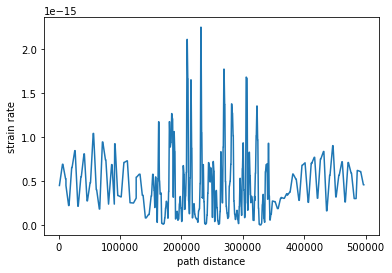

In [20]:
import matplotlib.pyplot as plt 

plt.plot(x,sr_mean)
plt.xlabel('path distance')
plt.ylabel('strain rate')

Note that *yt* actually has the ability to build this plot for us in better ways using the [`yt.LinePlot` method](https://yt-project.org/doc/visualizing/plots.html#d-line-sampling). This method will actually use the appropriate shapefunctions to sample the elements intersected by the line, but since the ASPECT-yt frontend is not yet parallelized, this method is too slow for the large dataset we're plotting here. 

### 3D rendering

See [here](https://nbviewer.jupyter.org/github/chrishavlin/AGU2020/blob/main/notebooks/aspect_unstructured.ipynb#3D-rendering-of-aspect-data) for an example of 3D rendering using *yt*'s [Unstructured Mesh Renderer](https://yt-project.org/doc/visualizing/unstructured_mesh_rendering.html).

